In [1]:
import sys
import importlib
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"../")
import mplhep as hep
import pickle
import glob
import ROOT
import coffea
import awkward as ak
from coffea import processor
from coffea.nanoevents.methods import vector
import dask_awkward as dak
import hist

Welcome to JupyROOT 6.30/07


/cvmfs/cms.cern.ch/el9_amd64_gcc12/lcg/root/6.30.07-024df6516c17fd2edef848a927a788f1/lib/ROOT/_facade.py:154: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  return _orig_ihook(name, *args, **kwds)
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, w

In [2]:
sys.path.insert(0,"../python/HNL_Plotting_HelperFunctions")
import MuonSystemReader
import HNL_Processor
import HNL_Processor_v2
import Processing_Helpers


In [3]:
sensitivity_hists = ["CSC_Cluster_Size", "CSC_Cluster_Eta", "CSC_Cluster_JetVetoPt", "CSC_Cluster_MuonVetoPt", "CSC_Cluster_PuppiMetDPhi",
                   "CSC_Cluster_DNNScore", "CSC_Cluster_Tau_DeltaEta", "CSC_Cluster_Tau_DeltaPhi", "tau_pt", "tau_eta", "tau_phi", "PUPPI_MET"]
#sensitivity_hists = ["CSC_Cluster_Eta", "CSC_Cluster_JetVetoPt", "CSC_Cluster_MuonVetoPt", "CSC_Cluster_PuppiMetDPhi"]                   
#sensitivity_hists = ["CSC_Cluster_JetVetoPt"]
#sensitivity_hists = ["CSC_Cluster_DNNScore", "CSC_Cluster_Tau_DeltaEta", "CSC_Cluster_Tau_DeltaEta"]
#sensitivity_hists = ["CSC_Cluster_Tau_DeltaEta", "CSC_Cluster_Tau_DeltaPhi"]
#sensitivity_hists = ["PUPPI_MET", "Num_Taus"]

In [4]:
HNL_2GeV_10ctau_path = "root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/signal_tau_mN2_ct1000/HNL_tau_mN_2_ctau_1000/normalized/HNL_tau_mN_2_ctau_1000.root"
signal_events  = MuonSystemReader.loadTree_nanoFactory(HNL_2GeV_10ctau_path)

/uscms/home/amalbert/.local/lib/python3.9/site-packages/dask_awkward/lib/structure.py:911: UserWarning: Please ensure that dask.awkward<nCscRechitClusters, npartitions=1>
        is partitionwise-compatible with dask.awkward<getitem, npartitions=1>
        (e.g. counts comes from a dak.num(array, axis=1)),
        otherwise this unflatten operation will fail when computed!
  warnings.warn(


In [5]:
importlib.reload(MuonSystemReader)
importlib.reload(HNL_Processor_v2)
#importlib.reload(Processing_Helpers)

<module 'HNL_Processor_v2' from '/uscms_data/d3/amalbert/el9_work/CMSSW_14_1_0_pre4/src/run3_llp_analyzer/HNL_Plotting_Scripts/../python/HNL_Plotting_HelperFunctions/HNL_Processor_v2.py'>

In [6]:
output_data = Processing_Helpers.processData_v2("root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/2024_Data_allChannels/", sensitivity_hists, tau_cluster_topo_hists=False)

root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/2024_Data_allChannels/Muon0-Run2024B-PromptReco-v1/normalized/Muon0-Run2024B-PromptReco-v1_goodLumi.root


['CSC_Cluster_Size', 'CSC_Cluster_Eta', 'CSC_Cluster_JetVetoPt', 'CSC_Cluster_MuonVetoPt', 'CSC_Cluster_PuppiMetDPhi', 'CSC_Cluster_DNNScore', 'CSC_Cluster_Tau_DeltaEta', 'CSC_Cluster_Tau_DeltaPhi', 'tau_pt', 'tau_eta', 'tau_phi', 'PUPPI_MET']
Generated Masks, Starting to Fill Event-Level Histograms
filling reco taus hists
Inverting Tau LooseID in data for cluster size
about to compute
root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/2024_Data_allChannels/Muon0-Run2024C-PromptReco-v1/normalized/Muon0-Run2024C-PromptReco-v1_goodLumi.root
['CSC_Cluster_Size', 'CSC_Cluster_Eta', 'CSC_Cluster_JetVetoPt', 'CSC_Cluster_MuonVetoPt', 'CSC_Cluster_PuppiMetDPhi', 'CSC_Cluster_DNNScore', 'CSC_Cluster_Tau_DeltaEta', 'CSC_Cluster_Tau_DeltaPhi', 'tau_pt', 'tau_eta', 'tau_phi', 'PUPPI_MET']
Generated Masks, Starting to Fill Event-Level Histograms
filling reco taus hists
Inverting Tau LooseID in data for cluster size
about to compute
root://cmseos.fnal.gov//store/group/lpclongl

/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])

In [7]:
#sensitivity_hists = ["CSC_Cluster_Tau_DeltaEta", "CSC_Cluster_Tau_DeltaPhi"]
processor = HNL_Processor_v2.HNL_Processor_v2(isMC=True, applyGenInfo=False)
output = processor.process(signal_events, hists_to_process = sensitivity_hists, tau_cluster_topo_hists=False)

['CSC_Cluster_Size', 'CSC_Cluster_Eta', 'CSC_Cluster_JetVetoPt', 'CSC_Cluster_MuonVetoPt', 'CSC_Cluster_PuppiMetDPhi', 'CSC_Cluster_DNNScore', 'CSC_Cluster_Tau_DeltaEta', 'CSC_Cluster_Tau_DeltaPhi', 'tau_pt', 'tau_eta', 'tau_phi', 'PUPPI_MET']
Generated Masks, Starting to Fill Event-Level Histograms
filling reco taus hists
about to compute


/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])

### Tau Kinematics

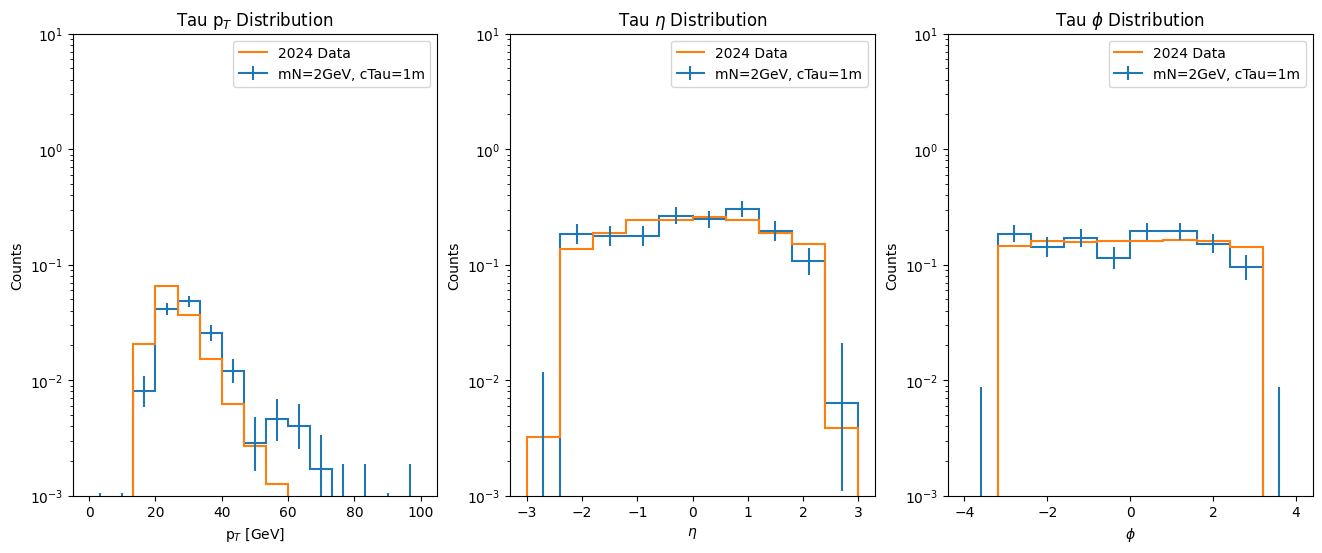

In [8]:
fig, axs = plt.subplots(1,3, figsize=(16,6))
signal_label = "mN=2GeV, cTau=1m"
data_label = "2024 Data"

#pT
h_pT = output["tau_pt"]
h_pT_data = output_data["tau_pt"]
h_pT.plot(ax=axs[0], label=signal_label, density=True)
h_pT_data.plot(ax=axs[0], label=data_label, density=True)
axs[0].set_title(h_pT.metadata["title"])
axs[0].set_ylabel(h_pT.metadata["y_label"])
axs[0].legend()
axs[0].set_yscale('log')
axs[0].set_ylim(1e-3, 10)

#eta
h_eta = output["tau_eta"]
h_eta_data = output_data["tau_eta"]
h_eta.plot(ax=axs[1], label=signal_label, density=True)
h_eta_data.plot(ax=axs[1], label=data_label, density=True)
axs[1].set_title(h_eta.metadata["title"])
axs[1].set_ylabel(h_eta.metadata["y_label"])
axs[1].legend()
axs[1].set_yscale('log')
axs[1].set_ylim(1e-3, 10)

#phi
h_phi = output["tau_phi"]
h_phi_data = output_data["tau_phi"]
h_phi.plot(ax=axs[2], label=signal_label, density=True)
h_phi_data.plot(ax=axs[2], label=data_label, density=True)
axs[2].set_title(h_phi.metadata["title"])
axs[2].set_ylabel(h_phi.metadata["y_label"])
axs[2].legend()
axs[2].set_yscale('log')
axs[2].set_ylim(1e-3, 10)


plt.show()

### CSC Cluster Plots

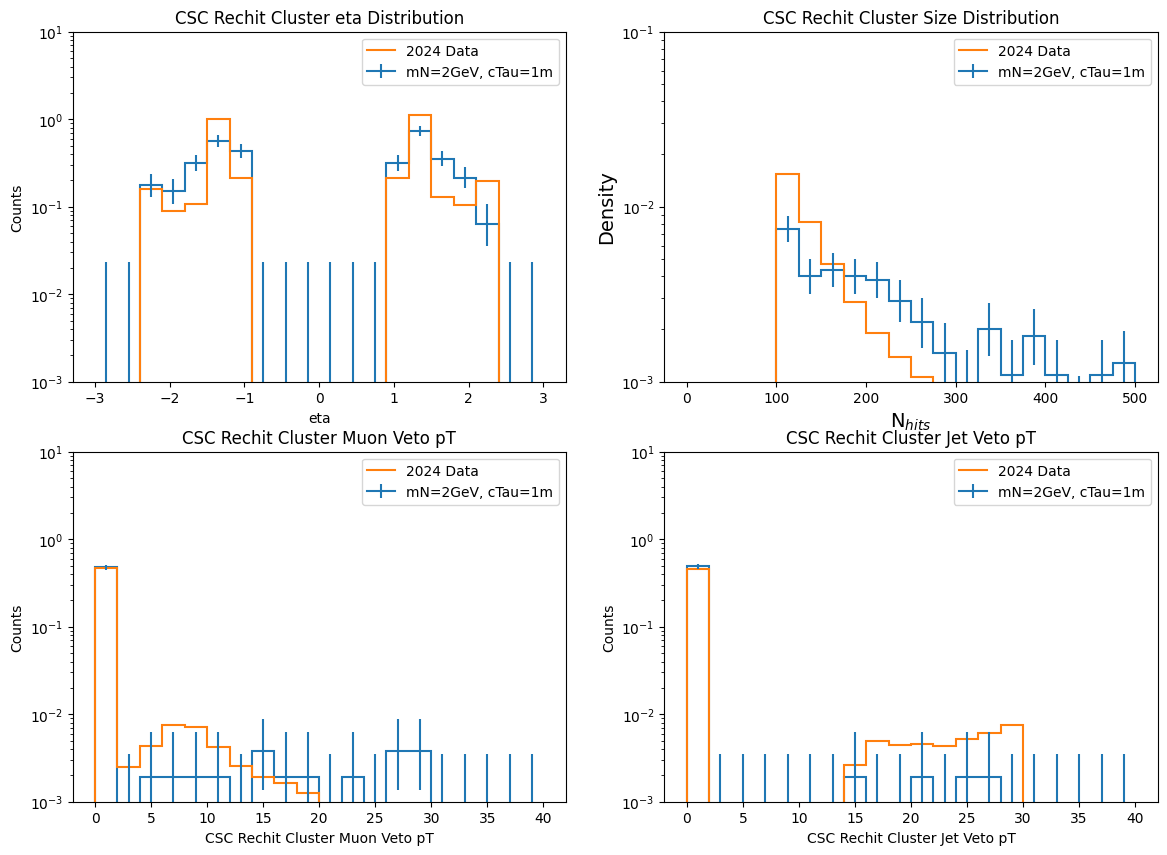

In [9]:
fig, axs = plt.subplots(2,2, figsize=(14,10))
signal_label = "mN=2GeV, cTau=1m"
data_label = "2024 Data"

#eta
h_pT = output["CSC_Cluster_Eta"]
h_pT_data = output_data["CSC_Cluster_Eta"]
h_pT.plot(ax=axs[0,0], label=signal_label, density=True)
h_pT_data.plot(ax=axs[0,0], label=data_label, density=True)
axs[0,0].set_title(h_pT.metadata["title"])
axs[0,0].set_ylabel(h_pT.metadata["y_label"])
axs[0,0].legend()
axs[0,0].set_yscale('log')
axs[0,0].set_ylim(1e-3, 10)

#size
h_eta = output["CSC_Cluster_Size"]
h_eta_data = output_data["CSC_Cluster_Size"]
h_eta.plot(ax=axs[0,1], label=signal_label, density=True)
h_eta_data.plot(ax=axs[0,1], label=data_label, density=True)
axs[0,1].set_title(h_eta.metadata["title"])
axs[0,1].set_ylabel("Density", fontsize=14)
axs[0,1].set_xlabel("N$_{hits}$", fontsize=14)
axs[0,1].legend()
axs[0,1].set_yscale('log')
axs[0,1].set_ylim(1e-3, 1e-1)
#axs[0,1].grid()

#muon veto pt
h_phi = output["CSC_Cluster_MuonVetoPt"]
h_phi_data = output_data["CSC_Cluster_MuonVetoPt"]
h_phi.plot(ax=axs[1,0], label=signal_label, density=True)
h_phi_data.plot(ax=axs[1,0], label=data_label, density=True)
axs[1,0].set_yscale('log')
axs[1,0].set_title(h_phi.metadata["title"])
axs[1,0].set_ylabel(h_phi.metadata["y_label"])
axs[1,0].legend()
axs[1,0].set_ylim(1e-3, 10)

#jet veto pt
h_phi = output["CSC_Cluster_JetVetoPt"]
h_phi_data = output_data["CSC_Cluster_JetVetoPt"]
h_phi.plot(ax=axs[1,1], label=signal_label, density=True)
h_phi_data.plot(ax=axs[1,1], label=data_label, density=True)
axs[1,1].set_yscale('log')
axs[1,1].set_title(h_phi.metadata["title"])
axs[1,1].set_ylabel(h_phi.metadata["y_label"])
axs[1,1].legend()
axs[1,1].set_ylim(1e-3, 10)


plt.show()

### MET-Related

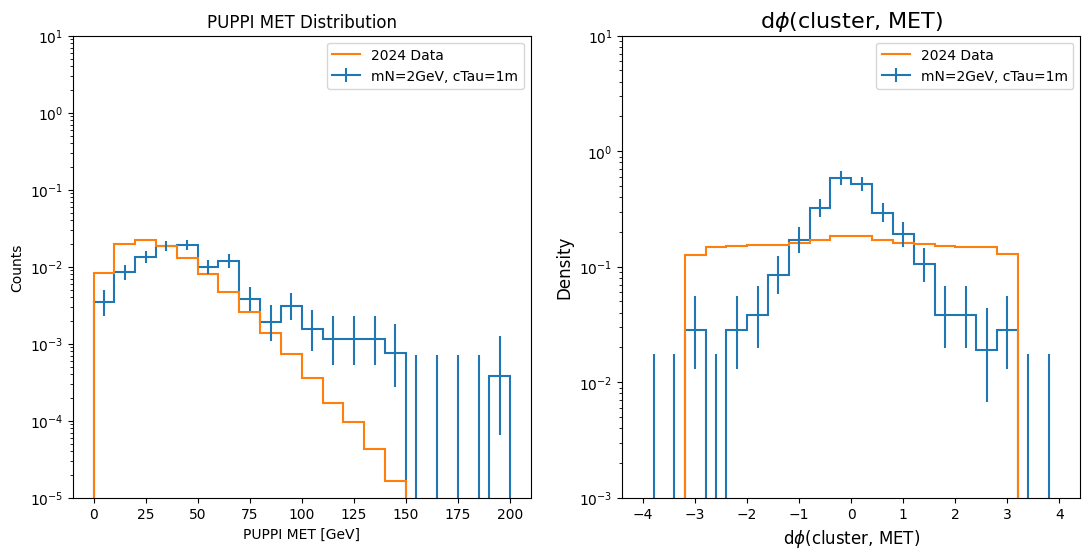

In [10]:
fig, axs = plt.subplots(1,2, figsize=(13,6))
signal_label = "mN=2GeV, cTau=1m"
data_label = "2024 Data"

#MET
h_pT = output["PUPPI_MET"]
h_pT_data = output_data["PUPPI_MET"]
h_pT.plot(ax=axs[0], label=signal_label, density=True)
h_pT_data.plot(ax=axs[0], label=data_label, density=True)
axs[0].set_title(h_pT.metadata["title"])
axs[0].set_ylabel(h_pT.metadata["y_label"])
axs[0].legend()
axs[0].set_yscale('log')
axs[0].set_ylim(1e-5, 10)

#dPhi(MET, cluster)
h_eta = output["CSC_Cluster_PuppiMetDPhi"]
h_eta_data = output_data["CSC_Cluster_PuppiMetDPhi"]
h_eta.plot(ax=axs[1], label=signal_label, density=True)
h_eta_data.plot(ax=axs[1], label=data_label, density=True)
axs[1].set_title("d$\phi$(cluster, MET)", fontsize=16)
axs[1].set_ylabel("Density", fontsize=12)
axs[1].set_xlabel("d$\phi$(cluster, MET)", fontsize=12)
axs[1].legend()
axs[1].set_yscale('log')
axs[1].set_ylim(1e-3, 10)


plt.show()

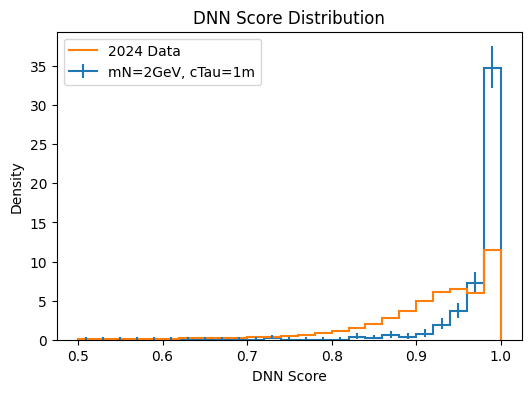

In [11]:
fig, axs = plt.subplots(1,1, figsize=(6,4))
signal_label = "mN=2GeV, cTau=1m"
data_label = "2024 Data"

#MET
h_pT = output["CSC_Cluster_DNNScore"]
h_pT_data = output_data["CSC_Cluster_DNNScore"]
h_pT.plot(ax=axs, label=signal_label, density=True)
h_pT_data.plot(ax=axs, label=data_label, density=True)

axs.set_title(h_pT.metadata["title"])
axs.set_ylabel("Density")
axs.legend()
#axs.set_yscale('log')
#axs.set_ylim(1e-3, 20)

### Topology Variables

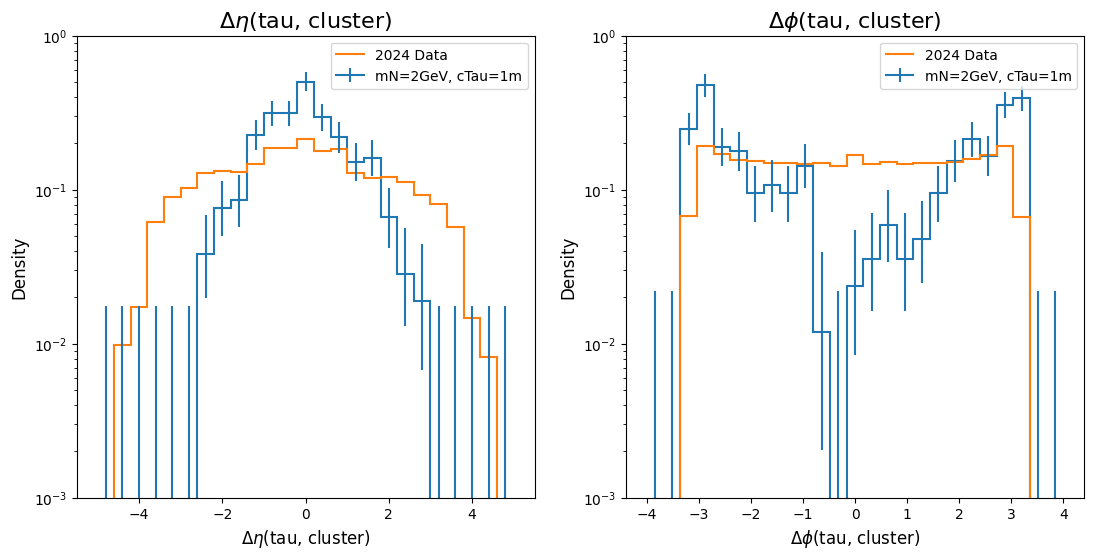

In [12]:
#with updated analyzer branches
fig, axs = plt.subplots(1,2, figsize=(13,6))
signal_label = "mN=2GeV, cTau=1m"
data_label = "2024 Data"

#dEta
h_pT = output["CSC_Cluster_Tau_DeltaEta"]
h_pT_data = output_data["CSC_Cluster_Tau_DeltaEta"]
h_pT.plot(ax=axs[0], label=signal_label, density=True)
h_pT_data.plot(ax=axs[0], label=data_label, density=True)
axs[0].set_title("$\Delta\eta$(tau, cluster)", fontsize=16)
axs[0].set_ylabel("Density", fontsize=12)
axs[0].set_xlabel("$\Delta\eta$(tau, cluster)", fontsize=12)
axs[0].legend()
axs[0].set_yscale('log')
axs[0].set_ylim(1e-3, 1)

#dPhi
h_eta = output["CSC_Cluster_Tau_DeltaPhi"]
h_eta_data = output_data["CSC_Cluster_Tau_DeltaPhi"]
h_eta.plot(ax=axs[1], label=signal_label, density=True)
h_eta_data.plot(ax=axs[1], label=data_label, density=True)
axs[1].set_title("$\Delta\phi$(tau, cluster)", fontsize=16)
axs[1].set_ylabel("Density", fontsize=12)
axs[1].set_xlabel("$\Delta\phi$(tau, cluster)", fontsize=12)
axs[1].legend()
axs[1].set_yscale('log')
axs[1].set_ylim(1e-3, 1)


plt.show()